## Importing Libraries 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv("D:messy_customer_sales_data.csv")
df

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,m,52.0,KOLKATA,2025-06-26,2025-05-17,26944.0,1.0,peckvictoria@example.com,2131107701,India
1,CUST5957,Jason Thomas,M,51.0 years,NaN,2021-02-17,2025-07-22,44152.0,2.0,owensanthony@example.com,1080761560,india
2,CUST3754,Brittney Martinez,F,62.0,hyderabad,2023-11-05,2024-12-08,31745.0,2.0,tara39@example.org,8981006345,India
3,CUST2934,Brenda Pierce,FEMALE,40.0,hyderabad,2022-03-13,2025-10-02,39674.0,1.0,berrynancy@example.org,8228064204,india
4,CUST5683,Matthew Carroll,f,41.0,CHENNAI,2024-04-05,2024-12-15,NaN,8.0,denise84@example.org,2665569480,India
...,...,...,...,...,...,...,...,...,...,...,...,...
10195,CUST10767,Robert Lewis,female,35.0 years,delhi,2020-12-08,2025-01-25,24167.0,9.0,barrycrane@example.net,5004696571,InDia
10196,NaN,Diane Evans,M,53.0,bangalore,2023-12-31,2025-05-07,11639.0,7.0,lisadennis@example.net,5200349941,IND
10197,CUST6315,Joshua Martinez,m,25.0,hyderabad,2022-02-15,2025-01-11,43832.0,2.0,kelli74@example.org,8147428496,India
10198,CUST4812,Sarah Miller,FEMALE,55.0,NaN,2021-03-16,2025-05-14,18827.0,10.0,dawn84@example.org,2987564247,InDia


### Checking Database data-types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         9177 non-null   object 
 1   Name                10200 non-null  object 
 2   Gender              9174 non-null   object 
 3   Age                 9249 non-null   object 
 4   City                9184 non-null   object 
 5   Signup_Date         10200 non-null  object 
 6   Last_Purchase_Date  9188 non-null   object 
 7   Purchase_Amount     9179 non-null   float64
 8   Feedback_Score      9177 non-null   float64
 9   Email               10200 non-null  object 
 10  Phone_Number        10200 non-null  int64  
 11  Country             9468 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 956.4+ KB


## After seeing the database info we get to know that
### Data-type of 'age','sign-up' and 'last_purchase_date' columns are object which needed to be change in INT and Date

In [12]:
df.describe()

,Purchase_Amount,Feedback_Score,Phone_Number
count,9.179000e+03,9177.000000,1.020000e+04
mean,2.909013e+04,5.479351,4.979974e+09
std,2.086971e+05,2.867123,2.902593e+09
min,-5.000000e+02,1.000000,9.208990e+05
25%,1.229500e+04,3.000000,2.449157e+09
50%,2.433000e+04,5.000000,4.988639e+09
75%,3.713000e+04,8.000000,7.510448e+09
max,9.999999e+06,10.000000,9.994402e+09


In [13]:
## Sometimes values are quite huge so it's show's in 'e+'

In [13]:
df.describe().round()

,Purchase_Amount,Feedback_Score,Phone_Number
count,9179.0,9177.0,1.020000e+04
mean,29090.0,5.0,4.979974e+09
std,208697.0,3.0,2.902593e+09
min,-500.0,1.0,9.208990e+05
25%,12295.0,3.0,2.449157e+09
50%,24330.0,5.0,4.988639e+09
75%,37130.0,8.0,7.510448e+09
max,9999999.0,10.0,9.994402e+09


#### It is showing the huge value in 'phone number' which is categorical value not numerical value we don't perform analysis on it.
#### 'Purcahse_Amount' has outliers like negetive value and max value is too big which larger than 75% of the data in the column

In [6]:
df.isnull().sum() # this will help you out find the missing value's total count in each column

Customer_ID           1023
Name                     0
Gender                1026
Age                    951
City                  1016
Signup_Date              0
Last_Purchase_Date    1012
Purchase_Amount       1021
Feedback_Score        1023
Email                    0
Phone_Number             0
Country                732
dtype: int64

In [9]:
df.shape

(10200, 12)

In [15]:
df.isnull().sum()/len(df)*100

Customer_ID           10.029412
Name                   0.000000
Gender                10.058824
Age                    9.323529
City                   9.960784
Signup_Date            0.000000
Last_Purchase_Date     9.921569
Purchase_Amount       10.009804
Feedback_Score        10.029412
Email                  0.000000
Phone_Number           0.000000
Country                7.176471
dtype: float64

## Customer_id is unique value and primary key column here

In [16]:
df.dropna().shape

(4528, 12)

### AS you can see diectly droping the missing value missing, will delete more half of the records from the data_set
### So we have to handle it in different way

In [17]:
df[df.duplicated].shape ## this will help to find out duplicated value

(15, 12)

## checking duplicate records

In [18]:
df[df.duplicated] 

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
2032,CUST2755,Casey Campbell,male,NaN,Hyderabad,2023-12-01,2024-11-04,11778.0,3.0,joseph49@example.com,3844741384,India
3191,NaN,Travis Schneider,f,51.0,NaN,2025-04-20,2025-02-28,48750.0,5.0,bianca77@example.net,7623118785,India
4312,CUST8305,Stanley Cain,FEMALE,51.0,Bangalore,2023-08-14,2024-11-01,11432.0,6.0,calderonbrenda@example.org,4889366037,India
5611,CUST6288,Jonathon Kim,male,46.0,Chennai,2023-11-22,2025-03-21,3301.0,6.0,tparker@example.com,5266662560,India
5680,CUST2695,Lisa Durham,NaN,46.0,Chennai,2021-04-18,2024-10-10,6511.0,3.0,andrew34@example.com,2235480149,India
5899,CUST8841,Amanda Hill,NaN,34.0,chennai,2022-09-11,2025-03-13,42092.0,4.0,ryanriley@example.net,3466026146,India
6070,CUST10780,Emily Smith,NaN,23.0,Kolkata,2023-12-09,2024-10-28,18027.0,5.0,perezchristopher@example.com,3032282870,India
6240,CUST9745,David Morales,NaN,56.0,NaN,2023-02-18,2024-12-14,49107.0,7.0,juliaknapp@example.com,9436163110,India
6425,CUST4631,George Villa,m,26.0,Mumbai,2022-05-21,2025-06-17,NaN,8.0,davidmarquez@example.com,8869465862,India
6498,CUST1711,Stephanie Elliott,NaN,44.0,MUMBAI,2023-05-17,2025-07-12,11349.0,9.0,nfischer@example.com,3270872546,NaN


### checking Primary key column data's for duplicacy

In [7]:
df['Customer_ID'].value_counts()

Customer_ID
CUST3344     2
CUST4893     2
CUST7000     2
CUST10824    2
CUST2695     2
            ..
CUST1386     1
CUST8835     1
CUST7335     1
CUST3085     1
CUST5957     1
Name: count, Length: 9000, dtype: int64

#### So you can see for the above 'customer_id' there's multiple entry

In [9]:
df['Customer_ID'].value_counts().head(10)
## As you know primary key columns can't have the duplicate data but here is

Customer_ID
CUST3344     2
CUST4893     2
CUST7000     2
CUST10824    2
CUST2695     2
CUST4390     2
CUST4186     2
CUST2242     2
CUST8746     2
CUST1299     2
Name: count, dtype: int64

In [10]:
df[df['Customer_ID']=='CUST3344'] 
## here is data is duplicate because of inconsistent formatting as you see 'City' column have spelling issue which leads to data duplicacy
## in some customer the issue is in 'Gender columns ' F insted of Female and M/male isnted of Male

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
4483,CUST3344,John Russell,M,65.0,MUMBAI,2023-11-21,2025-08-10,36235.0,8.0,sandra86@example.org,4225788150,India
6218,CUST3344,John Russell,male,65.0,Mumbai,2023-11-21,2025-08-10,36235.0,8.0,sandra86@example.org,4225788150,India


### checking categorical column values and it's unique values

In [23]:
# Here using loops we are showing columns which has less than 20 unique values
# nunique provides us number of unique values in the columns.
for col in df.columns:
    if df [col]. nunique()<20:
        print(df[col].value_counts())
        print('-'*50)

Gender
M         1056
m         1053
f         1051
F         1039
male      1017
MALE      1014
female    1010
FEMALE    1003
Name: count, dtype: int64
--------------------------------------------------
City
Kolkata       739
Mumbai        721
Chennai       702
Delhi         697
Bangalore     692
Hyderabad     673
CHENNAI       370
hyderabad     352
bangalore     350
DELHI         349
MUMBAI        349
KOLKATA       343
HYDERABAD     340
delhi         330
BANGALORE     325
mumbai        316
chennai       308
kolkata       303
Name: count, dtype: int64
--------------------------------------------------
Feedback_Score
2.0     858
7.0     851
4.0     847
8.0     842
6.0     830
3.0     820
1.0     816
9.0     814
10.0    800
5.0     794
Name: count, dtype: int64
--------------------------------------------------
Country
India    6426
IND       704
InDia     694
india     689
Name: count, dtype: int64
--------------------------------------------------


### you can see inconsistent formatting in each column expect 'feed_back_score'

## Handling Missing Values:

In [11]:
df.columns

Index(['Customer_ID', 'Name', 'Gender', 'Age', 'City', 'Signup_Date',
       'Last_Purchase_Date', 'Purchase_Amount', 'Feedback_Score', 'Email',
       'Phone_Number', 'Country'],
      dtype='object')

In [21]:
df.dropna(subset=['Customer_ID'], inplace=True) 
#using subset we remove the duplicate data from a specific column.

In [22]:
df.isnull().sum()
## As you can see the missing values of 'Customer_ID',Name,Email,Phone_number columns missing value is 0.

Customer_ID             0
Name                    0
Gender                934
Age                   859
City                  918
Signup_Date             0
Last_Purchase_Date    914
Purchase_Amount       927
Feedback_Score        905
Email                   0
Phone_Number            0
Country               664
dtype: int64

In [25]:
## Doing inputation in Categorical columns
df["Age"].unique()

array(['52.0', '51.0 years', '62.0', '40.0', '41.0', nan, '18.0',
       '43.0 years', '40.0 years', '26.0', '32.0', '22.0', '59.0', '65.0',
       '61.0', '31.0', '54.0 years', '26.0 years', '55.0', '69.0',
       '61.0 years', '24.0', '63.0', '19.0', '50.0', '56.0', '36.0',
       '68.0', '43.0', '38.0', '48.0', '27.0', '57.0 years', '23.0',
       '25.0', '66.0', '28.0', '30.0', '44.0', '46.0', '20.0', '37.0',
       '67.0', '51.0', '35.0', '58.0', '29.0', 'nan years', '39.0',
       '49.0', '47.0', '42.0', '54.0', '64.0', '53.0', '60.0',
       '59.0 years', '45.0', '21.0', '34.0', '48.0 years', '46.0 years',
       '33.0', '57.0', '30.0 years', '58.0 years', '35.0 years',
       '34.0 years', '69.0 years', '250', '19.0 years', '27.0 years',
       '53.0 years', '65.0 years', '66.0 years', '44.0 years',
       '49.0 years', '25.0 years', '23.0 years', '62.0 years',
       '41.0 years', '33.0 years', '28.0 years', '22.0 years',
       '20.0 years', '42.0 years', '55.0 years', '45.0 

#### you can see above there is inconsistent formatting and outliers and'nan' in the dataset

### first we will treat 'nan' and remove numbers only from mixed data's

In [19]:
#df['Age'].apply(lambda x: re.findall('[0-9]+', str(x))) ###this will help us find the single volue in 'Age' column
import re
def extract_age(age):
    age_num= re.findall('[0-9]+', str(age))
    if len(age_num)>0:
        return age_num[0]
    else:
        
        return age

df['Age'].apply(lambda x: extract_age(x))

0        52
1        51
2        62
3        40
4        41
         ..
10194    40
10195    35
10197    25
10198    55
10199    34
Name: Age, Length: 9177, dtype: object

In [20]:
df['Age']=df['Age'].apply(lambda x: extract_age(x)) ## after applyin this function all the in-consistent formatting will be correct

In [18]:
df['Age']

0              52.0
1        51.0 years
2              62.0
3              40.0
4              41.0
            ...    
10194          40.0
10195    35.0 years
10197          25.0
10198          55.0
10199          34.0
Name: Age, Length: 9177, dtype: object

In [17]:
df['Age'].unique()

array(['52.0', '51.0 years', '62.0', '40.0', '41.0', nan, '18.0',
       '43.0 years', '40.0 years', '26.0', '32.0', '22.0', '59.0', '65.0',
       '61.0', '31.0', '54.0 years', '55.0', '69.0', '61.0 years', '24.0',
       '63.0', '19.0', '50.0', '56.0', '36.0', '68.0', '43.0', '38.0',
       '27.0', '57.0 years', '23.0', '25.0', '66.0', '28.0', '30.0',
       '46.0', '48.0', '20.0', '37.0', '67.0', '51.0', '35.0', '58.0',
       '29.0', 'nan years', '39.0', '49.0', '47.0', '42.0', '44.0',
       '64.0', '53.0', '60.0', '59.0 years', '45.0', '21.0', '34.0',
       '54.0', '48.0 years', '46.0 years', '33.0', '57.0', '30.0 years',
       '58.0 years', '35.0 years', '34.0 years', '69.0 years', '250',
       '19.0 years', '27.0 years', '53.0 years', '65.0 years',
       '66.0 years', '44.0 years', '49.0 years', '25.0 years',
       '23.0 years', '62.0 years', '41.0 years', '33.0 years',
       '28.0 years', '22.0 years', '20.0 years', '42.0 years',
       '45.0 years', '3', '63.0 years', '

#### you can see above there is still nan value in the column

In [26]:
df_age = df[df['Age'] != 'nan years']['Age']

In [27]:
age_median = int(df_age.dropna().astype('int64').median()) ## calcualting median value of age column excluding nan values

In [32]:
age_median ## you can the see the age column medican value 

43

In [33]:
df.replace('nan years', age_median, inplace = True) #this will help us to replace nan value with median we have calcualted

In [34]:
df['Age'].fillna(age_median, inplace = True) # filling empty data in age column with 'median' we have calculated

In [35]:
df['Age']. unique()

array(['52', '51', '62', '40', '41', 43, '18', '43', '26', '32', '22',
       '59', '65', '61', '31', '54', '55', '69', '24', '63', '19', '50',
       '56', '36', '68', '38', '48', '27', '57', '23', '25', '66', '28',
       '30', '44', '46', '20', '37', '67', '35', '58', '29', '39', '49',
       '47', '42', '64', '53', '60', '45', '21', '34', '33', '250', '3',
       '10'], dtype=object)

In [31]:
df['Purchase_Amount']

0        26944.0
1        44152.0
2        31745.0
3        39674.0
4            NaN
          ...   
10194    35101.0
10195    24167.0
10197    43832.0
10198    18827.0
10199    35211.0
Name: Purchase_Amount, Length: 9177, dtype: float64

In [36]:
df['Purchase_Amount'].fillna(df['Purchase_Amount'].median(), inplace = True)

In [37]:
df.isnull().sum()

Customer_ID           1023
Name                     0
Gender                1026
Age                      0
City                  1016
Signup_Date              0
Last_Purchase_Date    1012
Purchase_Amount          0
Feedback_Score        1023
Email                    0
Phone_Number             0
Country                732
dtype: int64

In [38]:
## 'Feedback_Score' is numerical value but workds like a type of categorical discreate values 
df['Feedback_Score'].fillna(df['Feedback_Score'].mode()[0], inplace = True)

#### As you can see the missin value from 'Feedback_score' is also removed.

In [14]:
df.isnull().sum()

Customer_ID             0
Name                    0
Gender                934
Age                   859
City                  918
Signup_Date             0
Last_Purchase_Date    914
Purchase_Amount       927
Feedback_Score        905
Email                   0
Phone_Number            0
Country               664
dtype: int64

### Now doing for two categorical columns ('Gender,Country and 'City)

In [40]:
## we will use first loops and mode
for col in ['Gender','City','Country']:
    df [col].fillna(df[col].mode()[0], inplace = True)

In [41]:
df.isnull().sum()
# you can see the above columns missing value is handled successfully. 

Customer_ID           1023
Name                     0
Gender                   0
Age                      0
City                     0
Signup_Date              0
Last_Purchase_Date    1012
Purchase_Amount          0
Feedback_Score           0
Email                    0
Phone_Number             0
Country                  0
dtype: int64

In [39]:
df['Last_Purchase_Date'].ffill(inplace = True)
#ffill- forward fill
# bfill-backword fill

In [40]:
df.isnull().sum()
# As you can see there is no missing value in the data_set

Customer_ID           0
Name                  0
Gender                0
Age                   0
City                  0
Signup_Date           0
Last_Purchase_Date    0
Purchase_Amount       0
Feedback_Score        0
Email                 0
Phone_Number          0
Country               0
dtype: int64

## Handling in-consistent formatting in Dataset

In [28]:
df["Gender"].unique() ## this will help us find different unique category in a column

array(['m ', 'M', 'F', 'FEMALE', 'f ', 'male', 'MALE', 'female', nan],
      dtype=object)

In [29]:
df['Gender']. str.lower().unique() ## it will help us convert the values in lowercase

array(['m ', 'm', 'f', 'female', 'f ', 'male', nan], dtype=object)

In [30]:
df['Gender']. str.lower().str.strip().unique() #str.strip removes the extra space

array(['m', 'f', 'female', 'male', nan], dtype=object)

In [31]:
df['Gender']= df['Gender']. str.lower().str.strip() #saving the last perform function on 'Gender' column

In [32]:
df['Gender'].str.lower().replace({'m ': 'male','f':'female'}, inplace= True)
#replacing value in columns
## we passed the dictionery for proper mapping

In [33]:
df['Gender'].unique()

array(['m', 'f', 'female', 'male', nan], dtype=object)

In [34]:
df['City'].unique()

array([' KOLKATA ', nan, ' hyderabad ', ' CHENNAI ', ' kolkata ',
       ' BANGALORE ', ' Hyderabad ', ' HYDERABAD ', ' Mumbai ',
       ' chennai ', ' Delhi ', ' bangalore ', ' Bangalore ', ' Kolkata ',
       ' delhi ', ' Chennai ', ' MUMBAI ', ' DELHI ', ' mumbai '],
      dtype=object)

In [76]:
df['City']. str.lower().str.strip().unique() # changing all into lower-case and removing extra space

array(['kolkata', 'hyderabad', 'chennai', 'bangalore', 'mumbai', 'delhi'],
      dtype=object)

In [35]:
df['City']= df['City']. str.lower().str.strip() # this save column  after apply above functions

In [36]:
df

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,m,52,kolkata,2025-06-26,2025-05-17,26944.0,1.0,peckvictoria@example.com,2131107701,India
1,CUST5957,Jason Thomas,m,51,NaN,2021-02-17,2025-07-22,44152.0,2.0,owensanthony@example.com,1080761560,india
2,CUST3754,Brittney Martinez,f,62,hyderabad,2023-11-05,2024-12-08,31745.0,2.0,tara39@example.org,8981006345,India
3,CUST2934,Brenda Pierce,female,40,hyderabad,2022-03-13,2025-10-02,39674.0,1.0,berrynancy@example.org,8228064204,india
4,CUST5683,Matthew Carroll,f,41,chennai,2024-04-05,2024-12-15,NaN,8.0,denise84@example.org,2665569480,India
...,...,...,...,...,...,...,...,...,...,...,...,...
10194,CUST6146,Cody Thompson,f,40,NaN,2024-08-21,2024-10-26,35101.0,1.0,mitchellrivera@example.net,6380823112,India
10195,CUST10767,Robert Lewis,female,35,delhi,2020-12-08,2025-01-25,24167.0,9.0,barrycrane@example.net,5004696571,InDia
10197,CUST6315,Joshua Martinez,m,25,hyderabad,2022-02-15,2025-01-11,43832.0,2.0,kelli74@example.org,8147428496,India
10198,CUST4812,Sarah Miller,female,55,NaN,2021-03-16,2025-05-14,18827.0,10.0,dawn84@example.org,2987564247,InDia


In [37]:
df['Country']

0        India
1        india
2        India
3        india
4        India
         ...  
10194    India
10195    InDia
10197    India
10198    InDia
10199    India
Name: Country, Length: 9177, dtype: object

In [38]:
df['Country'].unique() #checking unique values 

array(['India', 'india', nan, 'InDia', 'IND'], dtype=object)

In [39]:
df['Country']. str.lower() #changing all similar type of value into lower case using str.lower()

0        india
1        india
2        india
3        india
4        india
         ...  
10194    india
10195    india
10197    india
10198    india
10199    india
Name: Country, Length: 9177, dtype: object

In [60]:
df['Country']. str.lower().unique() #checing sucessful execution

array(['india', 'ind'], dtype=object)

In [40]:
df['Country']= df['Country']. str.lower() # saving the execution to main file

In [41]:
df['Country'].replace({'ind':'india'}, inplace= True) # replace the the one to another value using .replace({})

In [42]:
df['Country'].unique()

array(['india', nan], dtype=object)

In [43]:
df[df.duplicated()]

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
1956,CUST8512,Matthew Roberts,m,49,bangalore,2023-04-03,2024-10-08,40325.0,1.0,donna18@example.org,1319901506,india
2032,CUST2755,Casey Campbell,male,NaN,hyderabad,2023-12-01,2024-11-04,11778.0,3.0,joseph49@example.com,3844741384,india
2110,CUST7014,Phillip Rodriguez,male,57,hyderabad,2021-07-18,2025-01-22,NaN,1.0,mooremonique@example.com,1392088762,india
2242,CUST2510,Henry Taylor,female,29,bangalore,2021-06-09,NaN,NaN,2.0,woodwilliam@example.com,6090100995,india
2557,CUST9618,Angela Potts,NaN,NaN,hyderabad,2025-06-05,2025-06-17,21618.0,4.0,tiffany18@example.com,508587852,india
...,...,...,...,...,...,...,...,...,...,...,...,...
10131,CUST4058,Ryan Myers,female,25,chennai,2021-05-29,2024-12-12,NaN,3.0,amberbaker@example.org,1072319959,india
10140,CUST4367,Amber Kennedy,f,61,bangalore,2023-11-05,2025-01-10,40711.0,8.0,kellifox@example.com,5600790669,india
10158,CUST1317,Ashley Hall,male,55,bangalore,2021-01-14,2024-10-26,15990.0,9.0,markhardin@example.net,6840741983,india
10182,CUST1740,Eric Rush,female,38,kolkata,2023-10-12,2024-12-05,12155.0,2.0,llee@example.org,3093645885,india


In [55]:
df[df.duplicated()].shape
# checking for duplicate records exact number

(0, 12)

In [44]:
df.drop_duplicates(inplace = True) #removing duplicates records

In [45]:
df.columns

Index(['Customer_ID', 'Name', 'Gender', 'Age', 'City', 'Signup_Date',
       'Last_Purchase_Date', 'Purchase_Amount', 'Feedback_Score', 'Email',
       'Phone_Number', 'Country'],
      dtype='object')

In [46]:
df['Customer_ID'].value_counts()
# as you can see after checking primary key columns there's still duplicate records present on it
# even after formatting fix

Customer_ID
CUST6477     2
CUST6833     2
CUST1852     2
CUST5561     2
CUST10462    2
            ..
CUST1386     1
CUST8835     1
CUST7335     1
CUST3085     1
CUST5957     1
Name: count, Length: 9000, dtype: int64

In [47]:
df[df['Customer_ID']== 'CUST3693' ]

#as you see the purchase date has duplicate this time

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
3967,CUST3693,Chad Dominguez,f,3,chennai,2022-01-20,2025-02-20,NaN,7.0,donnaacosta@example.net,7342776270,india
4953,CUST3693,Chad Dominguez,f,54,chennai,2022-01-20,2025-02-20,NaN,7.0,donnaacosta@example.net,7342776270,india


In [106]:
df.drop_duplicates(subset=['Customer_ID'], keep ='first').shape
# As you can see the records in dataset after removing duplicate (10200,12)

(9000, 12)

In [52]:
df.drop_duplicates(subset=['Customer_ID'], keep ='first', inplace = True) # applying on the data_set

In [53]:
df.shape

(9001, 12)

In [54]:
df["Age"]

0        52
1        51
2        62
3        40
4        41
         ..
10193    26
10194    40
10195    35
10197    25
10198    55
Name: Age, Length: 9001, dtype: int64

In [50]:
df["Age"] = df["Age"].astype('int64')

In [51]:
df["Age"]

0        52
1        51
2        62
3        40
4        41
         ..
10195    35
10196    53
10197    25
10198    55
10199    34
Name: Age, Length: 10200, dtype: int64

In [115]:
df.columns

Index(['Customer_ID', 'Name', 'Gender', 'Age', 'City', 'Signup_Date',
       'Last_Purchase_Date', 'Purchase_Amount', 'Feedback_Score', 'Email',
       'Phone_Number', 'Country'],
      dtype='object')

In [49]:
df["Signup_Date"] = pd.to_datetime(df['Signup_Date'])

In [48]:
df["Last_Purchase_Date"] = pd.to_datetime(df['Last_Purchase_Date'])

In [119]:
df.dtypes

Customer_ID                   object
Name                          object
Gender                        object
Age                            int64
City                          object
Signup_Date           datetime64[ns]
Last_Purchase_Date    datetime64[ns]
Purchase_Amount              float64
Feedback_Score               float64
Email                         object
Phone_Number                   int64
Country                       object
dtype: object

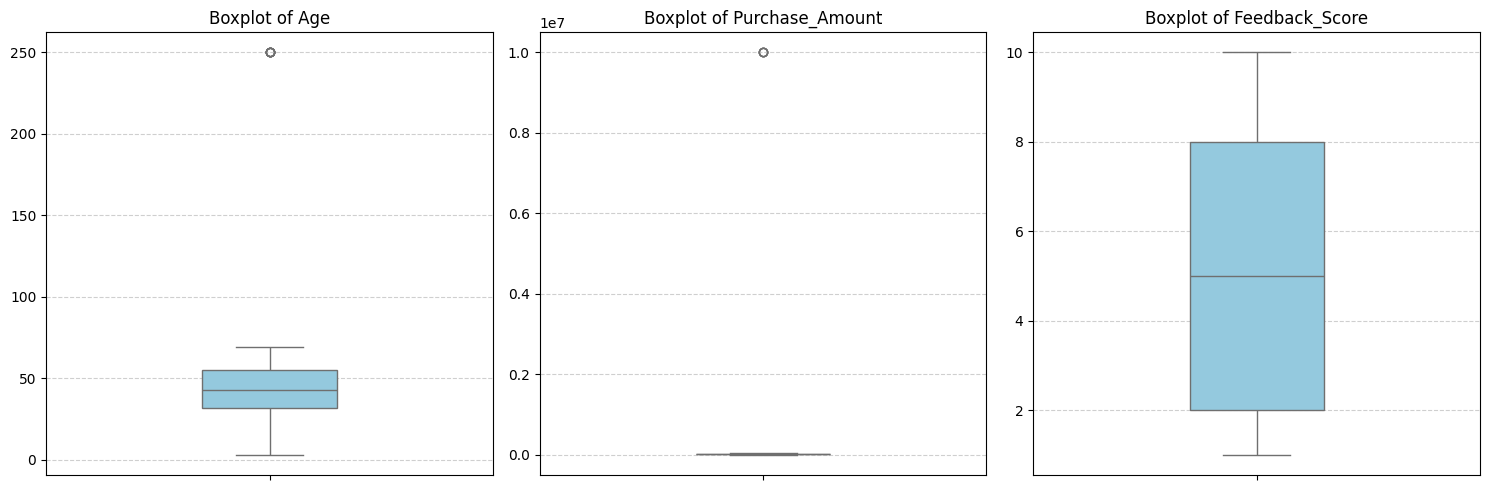

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Age', 'Purchase_Amount', 'Feedback_Score']

plt.figure(figsize=(15, 5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color='skyblue', width=0.3)
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.ylabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [41]:
pip install scipy

   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   - -------------------------------------- 1.0/39.4 MB 8.1 MB/s eta 0:00:05
   -- ------------------------------------- 2.4/39.4 MB 6.7 MB/s eta 0:00:06
   --- ------------------------------------ 3.4/39.4 MB 6.0 MB/s eta 0:00:06
   ---- ----------------------------------- 4.2/39.4 MB 5.9 MB/s eta 0:00:06
   ----- ---------------------------------- 5.5/39.4 MB 5.7 MB/s eta 0:00:06
   ------ --------------------------------- 6.6/39.4 MB 5.5 MB/s eta 0:00:06
   ------- -------------------------------- 7.6/39.4 MB 5.6 MB/s eta 0:00:06
   -------- ------------------------------- 8.7/39.4 MB 5.4 MB/s eta 0:00:06
   --------- ------------------------------ 9.4/39.4 MB 5.4 MB/s eta 0:00:06
   ---------- ----------------------------- 10.2/39.4 MB 5.1 MB/s eta 0:00:06
   ----------- ---------------------------- 11.0/39.4 MB 5.0 MB/s eta 0:00:06
   ----------- ---------------------------- 11.8/39.4 MB 4.9 MB/s eta 0:00:06
   

In [63]:
from scipy import stats
import numpy as np

In [62]:
stats.zscore(df[['Age', 'Purchase_Amount']]) #calculating Z-score using stats

## wheneevr you remove negetive outliers using z-score you have to see 
## the columns/ records having more have 3 std deviation ,so we can remove it

array([[ 0.54937542, -0.01017491],
       [ 0.48411049,  0.07150306],
       [ 1.20202474,  0.01261309],
       ...,
       [-0.56012843, -0.02335598],
       [-1.21277776,  0.06998418],
       [ 0.74517021, -0.04870235]], shape=(9001, 2))

In [65]:
# removing negetive values
np.abs(stats.zscore(df[['Age', 'Purchase_Amount', 'Feedback_Score']]))

array([[0.54937542, 0.01017491, 1.42221284],
       [0.48411049, 0.07150306, 1.07852508],
       [1.20202474, 0.01261309, 1.07852508],
       ...,
       [0.56012843, 0.02335598, 1.32728919],
       [1.21277776, 0.06998418, 1.07852508],
       [0.74517021, 0.04870235, 1.67097694]], shape=(9001, 3))

In [67]:
# applying on the dataset
z_scores = np.abs(stats.zscore(df[['Age', 'Purchase_Amount', 'Feedback_Score']]))

In [70]:
#data filter-out as per columns basis to find-out columns having more than-2 'z-score'
(z_scores > 3).any(axis = 1)

array([False, False, False, ..., False, False, False], shape=(9001,))

In [71]:
df[(z_scores > 3).any(axis = 1)] # checking the outiers on the database

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
470,CUST6977,Tyler Stout,FEMALE,250,chennai,2022-05-21,NaT,3554.0,2.0,hudsonsandra@example.net,5752427586,india
932,CUST1207,Cathy Robinson,f,250,Delhi,2024-10-24,2025-10-01,23012.0,6.0,jefftaylor@example.org,1244788430,india
2383,CUST3987,Erica Johnson,MALE,47,Kolkata,2020-11-03,2025-08-10,9999999.0,5.0,bflowers@example.com,747807729,india
3368,CUST7314,Gavin Yates,m,50,bangalore,2022-06-30,2025-03-22,9999999.0,10.0,millermichael@example.com,1481715956,india
4674,CUST8481,Denise Combs,FEMALE,62,MUMBAI,2024-10-06,2025-07-08,9999999.0,3.0,cmorales@example.net,2931912910,india
4692,CUST10561,Richard Brown,f,58,Mumbai,2024-04-13,2025-09-08,9999999.0,2.0,kevintaylor@example.net,7047881855,india
5279,CUST4536,Alexandra Ramos,MALE,250,CHENNAI,2021-09-30,2025-03-03,3296.0,10.0,drakemichelle@example.org,5651607326,india
5949,CUST7041,Joseph Young,MALE,250,Delhi,2022-01-20,2024-11-26,1131.0,8.0,pmckenzie@example.org,9456700786,india
6085,CUST8110,Betty Cole,FEMALE,250,BANGALORE,2024-01-07,2025-04-12,25974.0,1.0,dmitchell@example.net,366613689,india
6615,CUST10236,Brittney Boyd,M,250,Kolkata,2022-04-01,2024-12-25,17284.0,3.0,andrewcraig@example.org,3843232885,india


In [72]:
df_clean= df[~(z_scores > 3).any(axis = 1)] # removing outliers in the database

### Show you are left with 8990 records and 12 columns out 10200 records 12 columns on which we can perform Analysis 
### We have reason to remove each data  when the reporting manager ask you why the 10-12% data is less than what we have received at the beginning. What are the action you have taken , how and why . 

In [73]:
df_clean.shape

# Show you are left with 8990 records and 12 columns out 10200 records 12 columns on which we can perform Analysis
## We have reason to remove each data  when the reporting manager ask you why the 10-12% data is less than what we have received at the beginning.
### What are the action you have taken , how and why . 

(8990, 12)

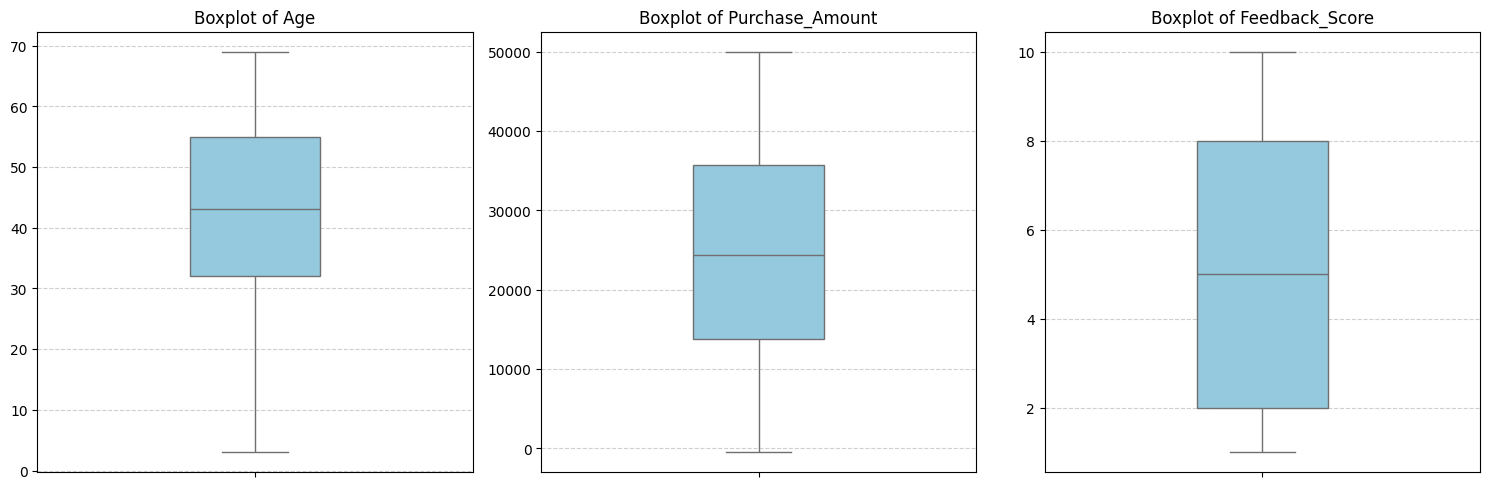

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Age', 'Purchase_Amount', 'Feedback_Score']

plt.figure(figsize=(15, 5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_clean[col], color='skyblue', width=0.3)
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.ylabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## you see there's are no outliers in the database.